# Question 1
Compute tokens, types, and TTR (Just present/print the stats related to each. DO NOT have a statement
that prints all the tokens in the pynb.)

In [80]:
import pandas as pd
import string
from nltk.tokenize import TweetTokenizer
import re
df = pd.read_csv(r'C:\Users\Ronak Kaoshik\Desktop\tweets-dataset.csv')
tknzr = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
s=''
for i in range(len(df['Sentence'])):
    s=s+df['Sentence'][i]+' '
a=re.sub("\S+\.co\S+","",s)
a=re.sub("#\S+","",a)
a=re.sub("[^\w\s]","",a)
a=tknzr.tokenize(a)
tokens=len(a)
types=len(set(a))
ttr=types/tokens
print('Number of tokens: '+str(tokens))
print('Number of types: '+str(types))
print("The TTR value is: "+str(ttr))

Number of tokens: 304769
Number of types: 35964
The TTR value is: 0.1180041277164016


# Question 2
Check if Zipf’s Law holds true for meanings and length. (You can take some 10-20 random words (for
which the meanings exists), get their meanings and work with those.)

Text(0, 0.5, 'Frequency of the word')

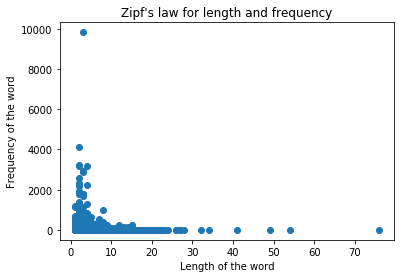

In [67]:
from nltk.corpus import wordnet
def getKey(item):
    return item[1]
l=[]
word, count =np.unique(a,return_counts=True)
for i in range(len(word)):
    l.append([word[i],count[i]])
#print(sorted(l, key=getKey, reverse=True))
#zipf's law for length of the word and frequency
x1=[]
y1=[]
d={}
for i in l:
    x1.append(len(i[0]))
    if not i[0] in l:
        d[i[0]]=i[1]
    y1.append(i[1])
plt.scatter(x1,y1)
plt.title("Zipf's law for length and frequency")
plt.xlabel('Length of the word')
plt.ylabel('Frequency of the word')

In [68]:
#zip's law for meaning of the word and frequency
import nltk
#nltk.download('wordnet')

Text(0, 0.5, 'Frequency of the word')

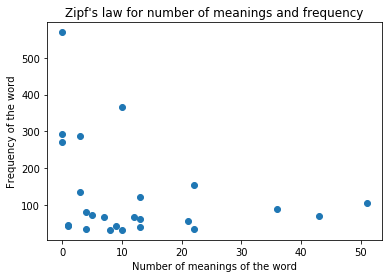

In [69]:
zipwords=['day','we','from','all','free','thanks','another','league','stop','card','page','many','did','said','need','super','pass','line','make','man','with','next','hot','around','let']
x2=[]
y2=[]
for i in zipwords:
    y2.append(d[i])
    x2.append(len(wordnet.synsets(i)))
plt.scatter(x2,y2)
plt.title("Zipf's law for number of meanings and frequency")
plt.xlabel('Number of meanings of the word')
plt.ylabel('Frequency of the word')

# Question 3
Plot Heap's law

The value of K is:
14.4208242852336
The value of beta is:
0.6200256382583474


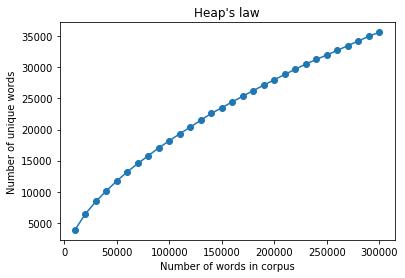

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
def fit_func(n, k, b):
    return k*(n**b)
tokens=[]
types=[]
for i in range(9999,len(a),10000):
    tokens.append(i)
    u=a[:i]
    types.append(len(set(u)))
plt.plot(tokens,types,marker='o')
plt.title("Heap's law")
plt.xlabel('Number of words in corpus')
plt.ylabel('Number of unique words')
params = curve_fit(fit_func, tokens, types)
#print(params[0])
print('The value of K is:')
print(params[0][0])
print('The value of beta is:')
print(params[0][1])